<a href="https://colab.research.google.com/github/niskaa-su/uas-penggalian-data/blob/main/UAS_PENGGALIAN_DATA_MANHATTAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U scipy

In [ ]:
pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 40.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Import dataset Iris
dataset = pd.read_excel("/content/Iris - Semester 3.xlsx")

dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Import dataset Iris
dataset = pd.read_excel("/content/Iris - Semester 3.xlsx")

# Drop kolom label jika ada (dalam kasus clustering, kita tidak memerlukannya)
# Gantilah 'nama_kolom_label' dengan nama kolom label yang sesuai dalam dataset Anda
# Jika tidak ada kolom label, Anda dapat melewatkan langkah ini.
# dataset = dataset.drop('nama_kolom_label', axis=1)

# Pilih hanya kolom numerik
numeric_columns = dataset.select_dtypes(include=['float64', 'int64']).columns
numeric_data = dataset[numeric_columns]

# Set nilai k = 3
k = 3

# Inisialisasi model KMeans
model = KMeans(n_clusters=k, init='random', n_init=10, max_iter=300, random_state=42, algorithm='full')

# Scaling data (penting untuk KMeans)
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data)

# Fit model ke dataset (gunakan fit_predict untuk langsung mendapatkan label)
labels = model.fit_predict(numeric_data_scaled)

# Cetak label cluster
print("Label Cluster:")
print(labels)

# Menambahkan kolom label dan jarak ke DataFrame
iris['Cluster_Labels'] = labels
iris['Manhattan_Distances'] = distances

# Cetak label cluster pada DataFrame
print("DataFrame with Cluster Labels:")
print(iris[['Id', 'Species', 'Cluster_Labels']])



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


Label Cluster:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
DataFrame with Cluster Labels:
      Id         Species  Cluster_Labels
0      1     Iris-setosa               1
1      2     Iris-setosa               1
2      3     Iris-setosa               1
3      4     Iris-setosa               1
4      5     Iris-setosa               1
..   ...             ...             ...
145  146  Iris-virginica               0
146  147  Iris-virginica               0
147  148  Iris-virginica               0
148  149  Iris-virginica               0
149  150  Iris-virginica               0

[150 rows x 3 columns]


In [ ]:
from sklearn.metrics import pairwise_distances_argmin_min
iris = pd.read_excel("/content/Iris - Semester 3.xlsx")

# Extracting features
data = iris.iloc[:, :4].values

kmeans = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, random_state=42, algorithm='full')

# Fit model ke data
kmeans.fit(data)

# Dapatkan label klaster untuk setiap sampel
labels = kmeans.labels_

# Dapatkan jarak Manhattan antara setiap sampel dan pusat klaster terdekat
distances = pairwise_distances_argmin_min(data, kmeans.cluster_centers_, metric='manhattan')[1]

# Cetak label klaster
print("Label Cluster:")
print(labels)

# Cetak jarak Manhattan untuk setiap sampel
print("Manhattan Distances:")
print(distances)

Label Cluster:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Manhattan Distances:
[24.23877551 23.59183673 22.69183673 21.76122449 20.25102041 20.10816327
 18.49183673 17.06122449 17.19183673 15.46122449 14.70816327 13.36122449
 12.69183673 12.49183673 11.63877551 10.70816327  9.03877551  7.23877551
  7.30816327  5.50816327  4.64897959  3.40816327  3.05102041  1.44897959
  0.66122449  1.56122449  2.16122449  3.30816327  4.27959184  5.66122449
  6.66122449  7.44897959  8.90816327 10.33877551 10.46122449 11.49183673
 12.73877551 13.46122449 15.19183673 15.14897959 16.25102041 18.79183673
 18.99183673 19.22040816 20.90816327 21.69183673 22.60816327 23.69183673
 24.60816327 25.19183673 25.492      23.692      23.492      21.608
 20.49

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


In [ ]:
from scipy.spatial.distance import cityblock  # Import cityblock for Manhattan distance
try:
    print("DataFrame with Cluster Labels:")
    print(iris[['Id', 'Species']])
except KeyError as e:
    print(f"Error: {e}")
# Hitung Manhattan Distance antara setiap data dan centroid
for i in range(k):
    centroid = kmeans.cluster_centers_[i]
    iris[f'Manhattan_Distance_to_Center_{i + 1}'] = iris.apply(lambda row: cityblock(row[1:5], centroid), axis=1)
    print(iris[['Id', 'Species', 'Manhattan_Distance_to_Center_1', 'Manhattan_Distance_to_Center_2', 'Manhattan_Distance_to_Center_3']])

DataFrame with Cluster Labels:
      Id         Species
0      1     Iris-setosa
1      2     Iris-setosa
2      3     Iris-setosa
3      4     Iris-setosa
4      5     Iris-setosa
..   ...             ...
145  146  Iris-virginica
146  147  Iris-virginica
147  148  Iris-virginica
148  149  Iris-virginica
149  150  Iris-virginica

[150 rows x 2 columns]
      Id         Species  Manhattan_Distance_to_Center_1  \
0      1     Iris-setosa                          77.208   
1      2     Iris-setosa                          77.908   
2      3     Iris-setosa                          78.008   
3      4     Iris-setosa                          78.008   
4      5     Iris-setosa                          77.208   
..   ...             ...                             ...   
145  146  Iris-virginica                          75.048   
146  147  Iris-virginica                          76.148   
147  148  Iris-virginica                          75.548   
148  149  Iris-virginica                     

In [36]:
output_file = "output_clustering_manhattan.xlsx"
iris.to_excel(output_file,index=False)

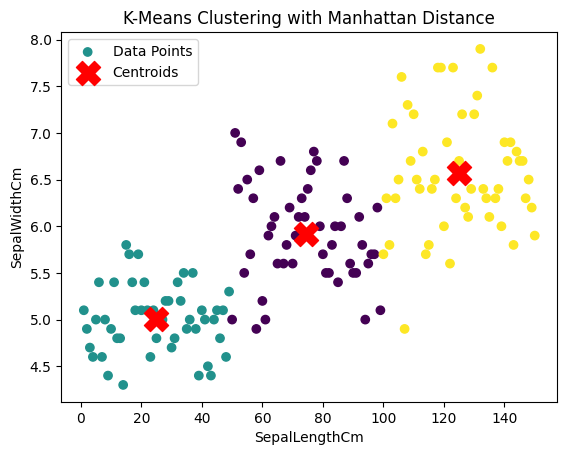

In [37]:
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', label='Data Points')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering with Manhattan Distance')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()
plt.show()